In [1]:
!git clone https://github.com/Amino21786/LMSMedicalSummerSchoolandConference.git

Cloning into 'LMSMedicalSummerSchoolandConference'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 58 (delta 4), reused 29 (delta 4), pack-reused 26 (from 1)
Receiving objects: 100% (58/58), 149.62 MiB | 24.18 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (39/39), done.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [18]:
# Define paths:
pdf_dir = "imagespdf"
dicom_dir = "imagesdicom"

In [19]:
def rotate_image(img, angle):
    if angle == 0: return img
    elif angle == 90: return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180: return cv2.rotate(img, cv2.ROTATE_180)
    elif angle == 270: return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [30]:
def orb_match_score(img1, img2, n_features=10000):
    orb = cv2.ORB_create(nfeatures=n_features, scaleFactor=1.5, nlevels=8, edgeThreshold=31, firstLevel=0, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE, patchSize=31)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    if des1 is None or des2 is None: return 0
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    return len(matches)


In [ ]:
def find_best_dicom_match(screenshot_path, dicom_dir):
    """
    screenshot_path: Path to the screenshot image.
    dicom_dir: Directory containing DICOM images.
    Returns the best matching DICOM image name, angle, score, and the images.
    
    """
    screenshot_orig = cv2.imread(screenshot_path, cv2.IMREAD_GRAYSCALE)
    best_score = -1
    best_match = None
    best_angle = 0
    best_dicom_img = None
    best_rotated_img = None

    for fname in sorted(os.listdir(dicom_dir)):
        if not fname.lower().endswith((".jpg", ".jpeg", ".png")): continue
        dcm_path = os.path.join(dicom_dir, fname)
        dcm_img = cv2.imread(dcm_path, cv2.IMREAD_GRAYSCALE)

        #for angle in [0, 90, 180, 270]:
        #rotated = rotate_image(screenshot_orig, angle)
        resized = cv2.resize(rotated, dcm_img.shape[::-1])
        score = orb_match_score(resized, dcm_img)

        print(f" {os.path.basename(screenshot_path)} vs {fname} @ {angle}° → Score: {score}")
        if score > best_score:
            best_score = score
            best_match = fname
            best_angle = angle
            best_dicom_img = dcm_img
            best_rotated_img = resized

    return best_match, best_angle, best_score, best_dicom_img, best_rotated_img

 pdf1_img1.jpg vs pydicom1_img1.jpg @ 0° → Score: 50
 pdf1_img1.jpg vs pydicom1_img1.jpg @ 90° → Score: 65
 pdf1_img1.jpg vs pydicom1_img1.jpg @ 180° → Score: 50
 pdf1_img1.jpg vs pydicom1_img1.jpg @ 270° → Score: 67
 pdf1_img1.jpg vs pydicom1_img2.jpg @ 0° → Score: 135
 pdf1_img1.jpg vs pydicom1_img2.jpg @ 90° → Score: 96
 pdf1_img1.jpg vs pydicom1_img2.jpg @ 180° → Score: 135
 pdf1_img1.jpg vs pydicom1_img2.jpg @ 270° → Score: 95
 pdf1_img1.jpg vs pydicom1_img3.jpg @ 0° → Score: 86
 pdf1_img1.jpg vs pydicom1_img3.jpg @ 90° → Score: 86
 pdf1_img1.jpg vs pydicom1_img3.jpg @ 180° → Score: 86
 pdf1_img1.jpg vs pydicom1_img3.jpg @ 270° → Score: 87
 pdf1_img1.jpg vs pydicom1_img4.jpg @ 0° → Score: 123
 pdf1_img1.jpg vs pydicom1_img4.jpg @ 90° → Score: 114
 pdf1_img1.jpg vs pydicom1_img4.jpg @ 180° → Score: 124
 pdf1_img1.jpg vs pydicom1_img4.jpg @ 270° → Score: 113
 pdf1_img1.jpg vs pydicom1_img5.jpg @ 0° → Score: 123
 pdf1_img1.jpg vs pydicom1_img5.jpg @ 90° → Score: 103
 pdf1_img1.jpg vs

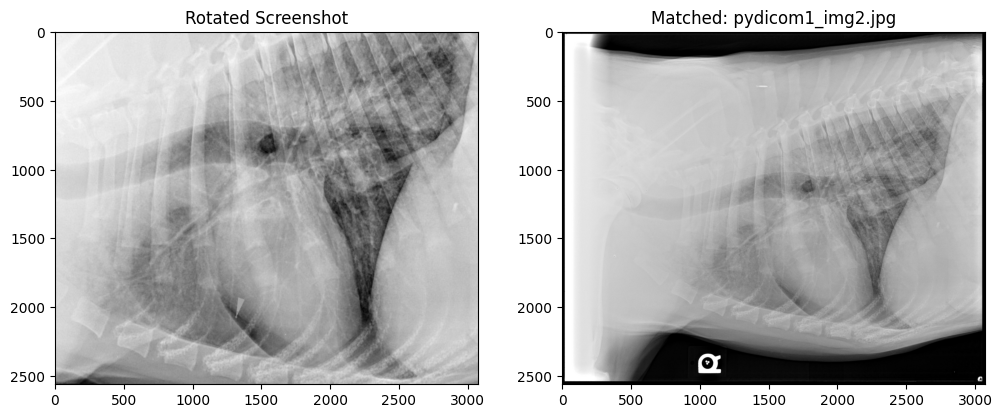

 pdf1_img2.jpg vs pydicom1_img1.jpg @ 0° → Score: 126
 pdf1_img2.jpg vs pydicom1_img1.jpg @ 90° → Score: 129
 pdf1_img2.jpg vs pydicom1_img1.jpg @ 180° → Score: 125
 pdf1_img2.jpg vs pydicom1_img1.jpg @ 270° → Score: 127
 pdf1_img2.jpg vs pydicom1_img2.jpg @ 0° → Score: 220
 pdf1_img2.jpg vs pydicom1_img2.jpg @ 90° → Score: 225
 pdf1_img2.jpg vs pydicom1_img2.jpg @ 180° → Score: 219
 pdf1_img2.jpg vs pydicom1_img2.jpg @ 270° → Score: 226
 pdf1_img2.jpg vs pydicom1_img3.jpg @ 0° → Score: 215
 pdf1_img2.jpg vs pydicom1_img3.jpg @ 90° → Score: 239
 pdf1_img2.jpg vs pydicom1_img3.jpg @ 180° → Score: 214
 pdf1_img2.jpg vs pydicom1_img3.jpg @ 270° → Score: 240
 pdf1_img2.jpg vs pydicom1_img4.jpg @ 0° → Score: 333
 pdf1_img2.jpg vs pydicom1_img4.jpg @ 90° → Score: 331
 pdf1_img2.jpg vs pydicom1_img4.jpg @ 180° → Score: 336
 pdf1_img2.jpg vs pydicom1_img4.jpg @ 270° → Score: 333
 pdf1_img2.jpg vs pydicom1_img5.jpg @ 0° → Score: 509
 pdf1_img2.jpg vs pydicom1_img5.jpg @ 90° → Score: 368
 pdf1_i

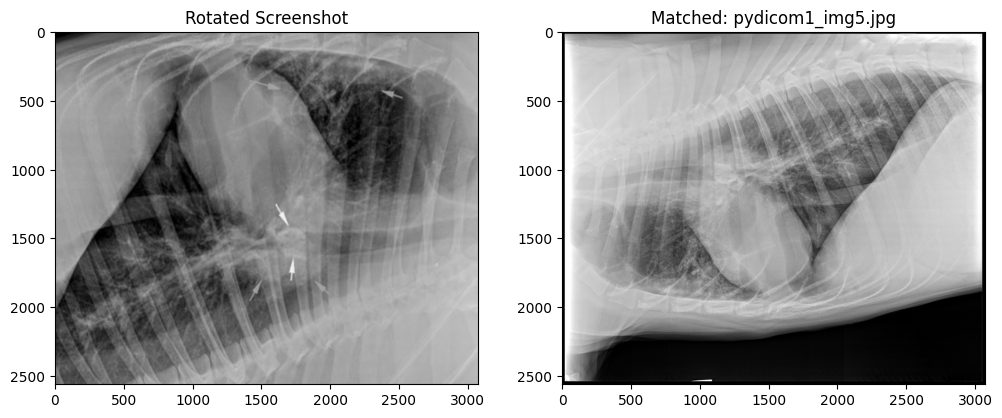

 pdf2_img1.jpg vs pydicom1_img1.jpg @ 0° → Score: 70
 pdf2_img1.jpg vs pydicom1_img1.jpg @ 90° → Score: 51
 pdf2_img1.jpg vs pydicom1_img1.jpg @ 180° → Score: 70
 pdf2_img1.jpg vs pydicom1_img1.jpg @ 270° → Score: 50
 pdf2_img1.jpg vs pydicom1_img2.jpg @ 0° → Score: 59
 pdf2_img1.jpg vs pydicom1_img2.jpg @ 90° → Score: 63
 pdf2_img1.jpg vs pydicom1_img2.jpg @ 180° → Score: 59
 pdf2_img1.jpg vs pydicom1_img2.jpg @ 270° → Score: 63
 pdf2_img1.jpg vs pydicom1_img3.jpg @ 0° → Score: 74
 pdf2_img1.jpg vs pydicom1_img3.jpg @ 90° → Score: 58
 pdf2_img1.jpg vs pydicom1_img3.jpg @ 180° → Score: 74
 pdf2_img1.jpg vs pydicom1_img3.jpg @ 270° → Score: 58
 pdf2_img1.jpg vs pydicom1_img4.jpg @ 0° → Score: 63
 pdf2_img1.jpg vs pydicom1_img4.jpg @ 90° → Score: 79
 pdf2_img1.jpg vs pydicom1_img4.jpg @ 180° → Score: 63
 pdf2_img1.jpg vs pydicom1_img4.jpg @ 270° → Score: 79
 pdf2_img1.jpg vs pydicom1_img5.jpg @ 0° → Score: 64
 pdf2_img1.jpg vs pydicom1_img5.jpg @ 90° → Score: 76
 pdf2_img1.jpg vs pydicom

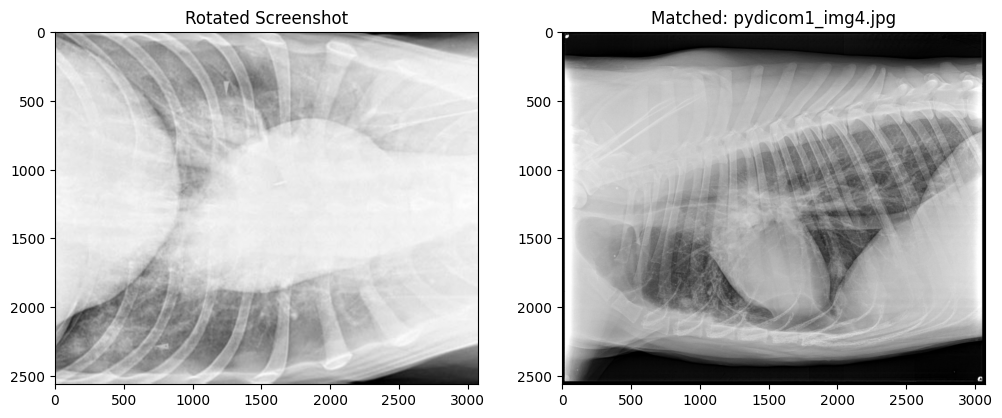

 pdf2_img2.jpg vs pydicom1_img1.jpg @ 0° → Score: 147
 pdf2_img2.jpg vs pydicom1_img1.jpg @ 90° → Score: 161
 pdf2_img2.jpg vs pydicom1_img1.jpg @ 180° → Score: 147
 pdf2_img2.jpg vs pydicom1_img1.jpg @ 270° → Score: 159
 pdf2_img2.jpg vs pydicom1_img2.jpg @ 0° → Score: 289
 pdf2_img2.jpg vs pydicom1_img2.jpg @ 90° → Score: 273
 pdf2_img2.jpg vs pydicom1_img2.jpg @ 180° → Score: 286
 pdf2_img2.jpg vs pydicom1_img2.jpg @ 270° → Score: 268
 pdf2_img2.jpg vs pydicom1_img3.jpg @ 0° → Score: 290
 pdf2_img2.jpg vs pydicom1_img3.jpg @ 90° → Score: 291
 pdf2_img2.jpg vs pydicom1_img3.jpg @ 180° → Score: 292
 pdf2_img2.jpg vs pydicom1_img3.jpg @ 270° → Score: 289
 pdf2_img2.jpg vs pydicom1_img4.jpg @ 0° → Score: 623
 pdf2_img2.jpg vs pydicom1_img4.jpg @ 90° → Score: 522
 pdf2_img2.jpg vs pydicom1_img4.jpg @ 180° → Score: 622
 pdf2_img2.jpg vs pydicom1_img4.jpg @ 270° → Score: 519
 pdf2_img2.jpg vs pydicom1_img5.jpg @ 0° → Score: 464
 pdf2_img2.jpg vs pydicom1_img5.jpg @ 90° → Score: 423
 pdf2_i

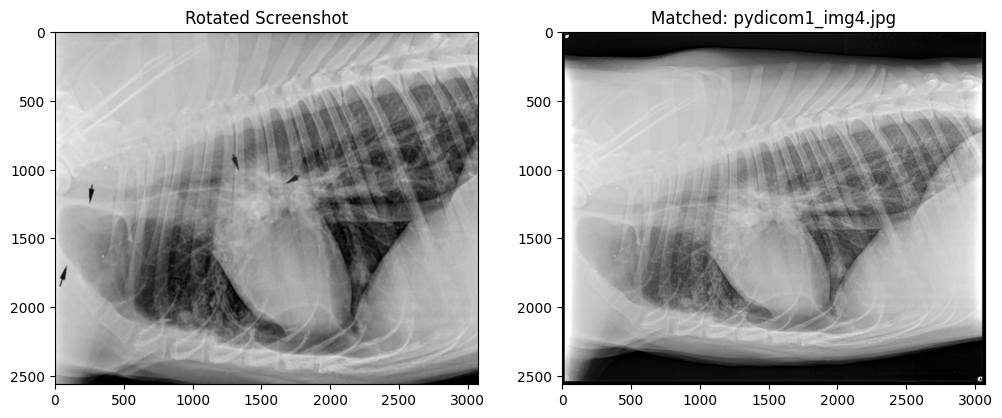

,pdf_image,matched_dicom,angle,score
0,pdf1_img1.jpg,pydicom1_img2.jpg,0,135
1,pdf1_img2.jpg,pydicom1_img5.jpg,180,510
2,pdf2_img1.jpg,pydicom1_img4.jpg,90,79
3,pdf2_img2.jpg,pydicom1_img4.jpg,0,623


In [ ]:
# Match all annotated screenshots to dicom images
pdf_images = sorted([
    os.path.join(pdf_dir, f) for f in os.listdir(pdf_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
])

results = []

for screenshot_path in pdf_images:
    matched_file, angle, score, dcm_img, rotated_img = find_best_dicom_match(screenshot_path, dicom_dir)
    #matched_file, angle, score, dcm_img, rotated_img = orb_match_score(screenshot_path, dicom_dir)
    # Show result
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rotated_img, cmap='gray')
    plt.title("Rotated Screenshot")

    plt.subplot(1, 2, 2)
    plt.imshow(dcm_img, cmap='gray')
    plt.title(f"Matched: {matched_file}")
    plt.show()

    results.append({
        'pdf_image': os.path.basename(screenshot_path),
        'matched_dicom': matched_file,
        'angle': angle,
        'score': score
    })

import pandas as pd
df = pd.DataFrame(results)
df.to_csv("matching_results.csv", index=False)
df


In [37]:
#Alternative method without rotation
def find_crop_in_full(image_crop, image_full, visualize=False):
    """
    Find where image_crop is located inside image_full using feature matching.

    Args:
        image_crop (np.ndarray): Cropped, possibly rotated image (smaller one).
        image_full (np.ndarray): Full image (larger one).
        visualize (bool): If True, displays a visualization of matches and the found region.

    Returns:
        corners_in_full (np.ndarray or None): Coordinates (4x2) of the crop corners in full image.
                                              Returns None if matching fails.
    """

    # Convert to grayscale
    gray_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY) if len(image_crop.shape) == 3 else image_crop
    gray_full = cv2.cvtColor(image_full, cv2.COLOR_BGR2GRAY) if len(image_full.shape) == 3 else image_full

    # Initialize ORB detector
    orb = cv2.ORB_create(1000)

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(gray_crop, None)
    kp2, des2 = orb.detectAndCompute(gray_full, None)

    if des1 is None or des2 is None:
        print("Could not find descriptors in one or both images.")
        return None

    # Match descriptors using brute-force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    if len(matches) < 4:
        print("Not enough matches found.")
        return None

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract location of good matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    # Compute homography
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is None:
        print("Homography could not be computed.")
        return None

    # Get the size of the cropped image
    h, w = gray_crop.shape[:2]
    corners_crop = np.float32([[0,0], [w,0], [w,h], [0,h]]).reshape(-1,1,2)

    # Map corners into full image using homography
    corners_in_full = cv2.perspectiveTransform(corners_crop, M)

    if visualize:
        # Draw the found location on the full image
        vis = image_full.copy()
        corners = np.int32(corners_in_full)
        cv2.polylines(vis, [corners], isClosed=True, color=(0,255,0), thickness=3)
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
        plt.title("Located crop in full image")
        plt.axis('off')
        plt.show()

    return corners_in_full.reshape(4,2)

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_crop_in_full(image_crop, image_full, visualize=False, max_size=1200, num_features = 250):
    """
    Locate image_crop inside image_full using ORB feature matching for 1 pdf jpg vs 1 dicom jpg

    Args:
        image_crop (str or np.ndarray): Cropped image (array or path).
        image_full (str or np.ndarray): Full image (array or path).
        visualize (bool): If True, displays a match overlay.
        max_size (int): Max width/height for downscaling large images.

    Returns:
        np.ndarray or None: (4x2) array of corner coordinates of the crop in the full image.
        matchess (int): Number of matches found.
    """
    def load_and_prepare(img):
        if isinstance(img, str):
            img = cv2.imread(img)
            #print(f"Loaded image from {img}")
            if img is None:
                raise ValueError(f"Image file '{img}' could not be read.")
        if max(img.shape[:2]) > max_size:
            scale = max_size / max(img.shape[:2])
            img = cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)))
        return img

    # Load images
    image_crop = load_and_prepare(image_crop)
    image_full = load_and_prepare(image_full)

    # Optional blur to reduce JPEG blockiness
    image_crop_blur = cv2.GaussianBlur(image_crop, (3,3), 0)
    image_full_blur = cv2.GaussianBlur(image_full, (3,3), 0)

    # Convert to grayscale
    gray_crop = cv2.cvtColor(image_crop_blur, cv2.COLOR_BGR2GRAY)
    gray_full = cv2.cvtColor(image_full_blur, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures = num_features) # feature matching

    # Detect and compute features
    kp1, des1 = orb.detectAndCompute(gray_crop, None)
    kp2, des2 = orb.detectAndCompute(gray_full, None)

    if des1 is None or des2 is None or len(kp1) < 4 or len(kp2) < 4:
        print("Not enough descriptors.")
        return None

    # Match descriptors
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(des1, des2)

    if len(matches) < 4:
        print("Not enough matches.")
        return None

    matches = sorted(matches, key=lambda x: x.distance)

    # Points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    # Find homography
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if M is None:
        print("Homography failed.")
        return None

    # Map crop corners to full image
    h, w = gray_crop.shape[:2]
    crop_corners = np.float32([[0,0], [w,0], [w,h], [0,h]]).reshape(-1,1,2)
    full_corners = cv2.perspectiveTransform(crop_corners, M)

    if visualize:
        vis = image_full.copy()
        cv2.polylines(vis, [np.int32(full_corners)], True, (0,255,0), 3)
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
        plt.title("Found Crop in Full Image")
        plt.axis('off')
        plt.colorbar()
        plt.show()

    return full_corners.reshape(4,2), len(matches)


#Now run this function over all pdf images and dicom images
def match_all_images(pdf_images, dicom_images):
    results = []
    for pdf_image in pdf_images:
        for dicom_image in dicom_images:
            corners, matches = find_crop_in_full(pdf_image, dicom_image, visualize=False)
            if corners is not None:
                results.append({
                    'pdf_image': os.path.basename(pdf_image),
                    'dicom_image': os.path.basename(dicom_image),
                    'corners': corners.tolist(),
                    'matches': matches
                })
    return pd.DataFrame(results)


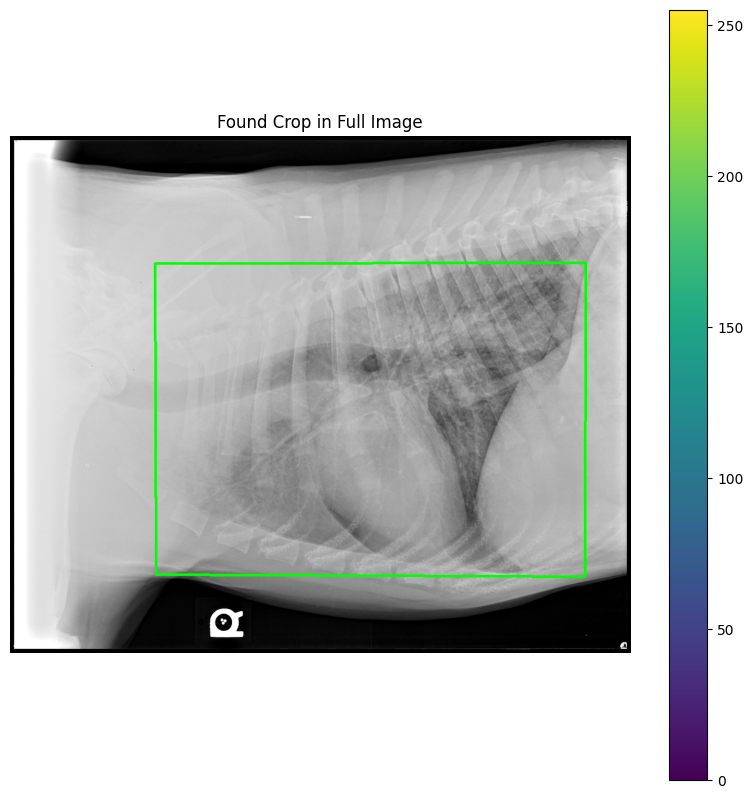

In [79]:
corners, no_matches = find_crop_in_full(image_crop = "imagespdf/pdf1_img1.jpg", image_full = "imagesdicom/pydicom1_img2.jpg", visualize=True)

In [69]:
pdf_filenames = []
dicom_filenames = []

pdf2_img1_path = "imagespdf/pdf2_img1.jpg"
dicom2_img1_path = "imagesdicom/pydicom1_img2.jpg"

crop_results = find_crop_in_full(pdf2_img1_path, dicom2_img1_path, visualize=True)

Not enough matches.


In [45]:
#template matching
pdf_img = cv2.imread("imagespdf/pdf2_img1.png")
dicom_img = cv2.imread("imagesdicom/pydicom1_img1.png")
#img_pdf_gray = cv2.cvtColor(pdf2_img1, cv2.COLOR_BGR2GRAY)
#img_dicom_gray = cv2.cvtColor(dicom1_img1, cv2.COLOR_BGR2GRAY)
result = cv2.matchTemplate(pdf_img, dicom_img)

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'matchTemplate'
> Overload resolution failed:
>  - matchTemplate() missing required argument 'method' (pos 3)
>  - matchTemplate() missing required argument 'method' (pos 3)
